In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def fun(x,a,b):
    return b*x

In [3]:
def model_g(x):
    return 2*x

In [4]:
x_obs=np.array(list(range(1,6,1)))
print(x_obs)

[1 2 3 4 5]


[ 3  6  9 12 15]
<class 'numpy.ndarray'>


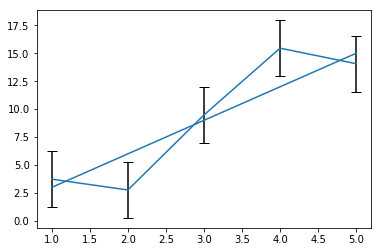

In [5]:
fun_obs=np.array([fun(x,2,3) for x in x_obs])
print(fun_obs)
print(type(fun_obs))

plt.plot(x_obs,fun_obs)
error_funobs=np.random.normal(0,2.5,len(fun_obs))
fun_obsss=fun_obs+error_funobs
fun_obs
plt.errorbar(x_obs, fun_obsss, yerr=2.5, ecolor='black', capsize=5)
plt.show()

In [6]:
model_theory=[model_g(x) for x in x_obs]
model_theory

[2, 4, 6, 8, 10]

$f(x)=f(x)_g+\frac {sum(f(x)_(obs)-f(x_(obs)_(guess)()*s(x)}{sum (s))}$

$s(x)=exp(-\frac {(x-x_(obs))^2}{2*dalta^2})$

In [7]:
def frac(x,x_obs,delta):                                
    A=np.zeros(len(x_obs))
    for i in range(len(x_obs)):             
        A[i]=np.exp(-((x-x_obs[i])**2)/(2*(pow(delta,2))))
    return sum(A)

print("this is s(x) for z=1: ",frac(1,x_obs,3)) 

x=np.linspace(0.1,5,2)

f=[frac(x,x_obs,1) for x in x]

print(f)

this is s(x) for z=1:  3.764339822043394
[0.8468761224941669, 1.753310402115391]


In [8]:
def s(x,x_obs,delta):                                
    A=np.zeros(len(x_obs))
    for i in range(len(x_obs)):             
        A[i]=np.exp(-((x-x_obs[i])**2)/(2*(pow(delta,2))))
    return A

In [16]:
def fun_smooth(x,temp,temp_obs,fun_obs,x_obs,delta,frac):
    
    m=fun_obs-temp_obs

    if type(x)!=np.ndarray:
        h=s(x,x_obs,delta)
        hh=m*h
        sigma=sum(hh)
        fracN=frac(x,x_obs,delta)


    else:

        f=np.array([s(x[i],x_obs,delta) for i in range(len(x))])

        ff= np.dot(f,m)
        sigma=sum(ff)
        fracN=np.array([frac(x,x_obs,1) for x in x])

    return temp+sigma/fracN

In [17]:
# result of fun_smooth :

# Example 1:
x=1
temp=model_g(x)
temp_obs=[model_g(x) for x in x_obs]

print("if x be scaler fun_smooth becom : " ,fun_smooth(x,temp,temp_obs,fun_obs,x_obs,1,frac))

if x be scaler fun_smooth becom :  3.5200847865911324


In [18]:
# Example 2:
x=np.linspace(0.1,10,2)
print(type(x))
temp=[model_g(x) for x in x]
temp_obs=[model_g(x) for x in x_obs]
print('np.shape(temp) ' , np.shape(temp))

print("\nif x be array fun_smooth becom : " ,fun_smooth(x,temp,temp_obs,fun_obs,x_obs,1,frac))

<class 'numpy.ndarray'>
np.shape(temp)  (2,)

if x be array fun_smooth becom :  [1.43126528e+00 2.78682572e+05]


In [19]:
def fun_smooth_n(x,fun_ini,fun_iniobs,fun_obs,x_obs,delta,n,frac):
        
    fun_temp = fun_ini
    fun_temp_obs = fun_iniobs
    fun_out = []
    fun_out.append(fun_temp)
    #print("len x is : ", len(x), '\n' )

    for _ in range(n):
        if type(x)!=np.ndarray:
            fun_x = fun_smooth(x,fun_temp,fun_temp_obs,fun_obs,x_obs,delta,frac)
            fun_x_obs = [fun_smooth(x_obs[i],fun_temp,fun_temp_obs,fun_obs,x_obs,delta,frac) for i in range(len(x_obs))]

        else:
            fun_x = [fun_smooth(x[i],fun_temp[i],fun_temp_obs,fun_obs,x_obs,delta,frac) for i in range(len(x)) ]
            fun_x_obs = [fun_smooth(x_obs[i],fun_temp[i],fun_temp_obs,fun_obs,x_obs,delta,frac) for i in range(len(x_obs))]

        fun_out.append(fun_x)      
        
        fun_temp = fun_x
        fun_temp_obs = fun_x_obs

    return fun_out 

In [20]:
##  1 Example

x=1
#print("len x is : " , len(x),'\n')
#print(x[0])

fun_iniobs = np.zeros(len(x_obs))
for i in range(len(x_obs)):
    fun_iniobs[i] = model_g(x_obs[i])
print("fun_iniobs is : " , fun_iniobs, '\n')

fun_ini = model_g(x)
print("fun_ini is : " ,fun_ini, '\n')

sol = fun_smooth_n(x,fun_ini,fun_iniobs,fun_obs,x_obs,5,3,frac)

print("*************",sol)

# print(fun_smooth(x,fun_ini,fun_iniobs,fun_obs,x_obs,5))

fun_iniobs is :  [ 2.  4.  6.  8. 10.] 

fun_ini is :  2 

************* [2, 4.844866380361154, 8.391503691324932, 8.11641681499523]


In [21]:
xtx=np.array([1,2,6,3,9])
type(xtx)

numpy.ndarray

In [22]:
##  2 Example

x = np.linspace(0.1,15,10)
# x=np.array(x)
# print(len(x))
print(type(x))

# fun_iniobs = np.zeros(len(x_obs))
# for i in range(len(x_obs)):
#     fun_iniobs[i] = model_g(x_obs[i])
# print(fun_iniobs)
# fun_ini = np.zeros(len(x))
# for i in range(len(x)):
#     fun_ini[i] = model_g(x[i])
# print(fun_ini)

fun_iniobs=[model_g(x) for x in x_obs]
fun_ini=[model_g(x) for x in x]

sol = fun_smooth_n(x,fun_ini,fun_iniobs,fun_obs,x_obs,1,3,frac)
# for i in sol:
#     print("this is for iteration : ", i , '\n')
    
print(sol)
print(np.shape(sol))

<class 'numpy.ndarray'>
[[0.2, 3.5111111111111115, 6.822222222222223, 10.133333333333333, 13.444444444444445, 16.755555555555556, 20.066666666666666, 23.37777777777778, 26.68888888888889, 30.0], [1.4312432055291704, 5.4608606726629425, 10.19840486635606, 14.64217764074511, 18.33912002772388, 21.734971570509856, 25.062718001356306, 28.377023000890254, 31.688744713863542, 34.999972463751014], [2.493510094129131, 5.79398744028266, 8.955722336970169, 12.190844564900434, 15.512693532749891, 18.82958715053467, 22.141992089788783, 25.453357691497693, 28.764517679697434, 32.07563813562568], [3.1865126894930023, 6.117172501684818, 8.495659493122703, 11.339374395628619, 14.603923098835152, 17.91405134767942, 21.225384964229242, 24.536554623886193, 27.847677510484964, 31.1587908922544]]
(4, 10)


[ 0.3         5.26666667 10.23333333 15.2        20.16666667 25.13333333
 30.1        35.06666667 40.03333333 45.        ]


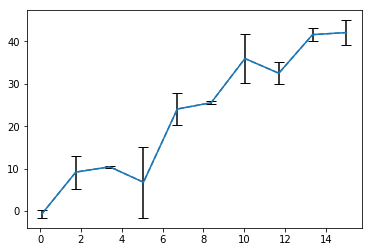

In [23]:
fun_obs=np.array([fun(x,2,3) for x in x])
print(fun_obs)
error_funobs=np.random.normal(0,5,len(fun_obs))
error_funobs
fun_obs=fun_obs+error_funobs
plt.plot(x,fun_obs,'--')
plt.errorbar(x, fun_obs, yerr=error_funobs, ecolor='black', capsize=5)
plt.show()

[0.2, 3.5111111111111115, 6.822222222222223, 10.133333333333333, 13.444444444444445, 16.755555555555556, 20.066666666666666, 23.37777777777778, 26.68888888888889, 30.0]
4


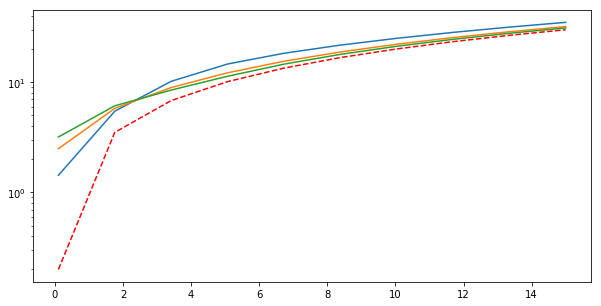

In [24]:
print(sol[0])
# print(sol[0][0])
print(len(sol))
fig,ax = plt.subplots(1,1,figsize=(10,5))

for i in range(len(sol)-1):
    ax.plot(x,sol[i+1])
    
plt.yscale('log')
plt.plot(x,sol[0],'r--')
plt.show()

# plt.plot(x,sol[0],'r--')
# plt.show()


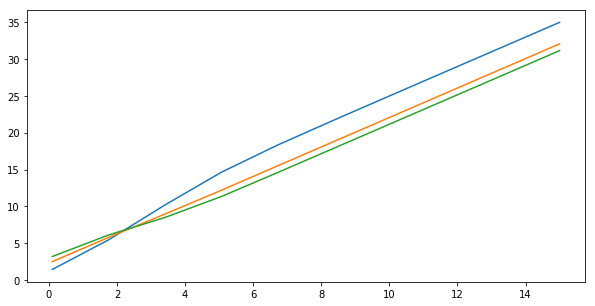

In [25]:
fun_obss=np.array([fun(x,2,5) for x in x])
error_funobss=np.random.normal(0,30,len(fun_obss))
error_funobss
fun_obss=fun_obss+error_funobss
fig,ax = plt.subplots(1,1,figsize=(10,5))

for i in range(len(sol)-1):
    ax.plot(x,sol[i+1])
plt.show()
    

# plt.plot(x,sol[0],'r--')
# ax.plot(x,fun_obss,color='r',marker='o',markersize=5)
# plt.errorbar(x, fun_obss, yerr=error_funobss, ecolor='black', capsize=5)
# plt.show()